In [1]:
import os
import pandas as pd
import numpy as np
import glob
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from statsmodels.tsa.stattools import ccf

### Leitura Arquivo files_29_01_and_06_05_concatenados_sem_NaNs

In [2]:
### Arquivo de segundos
caminho_arquivos_pkl_29_01_and_20_05 = r'H:\Path_Python\Dados_Python_2024\Lameirinho\Ficheiros_PKL_Saida\Arquivos_concatenados\files_29_01_and_20_05_concatenados_sem_NaNs.pkl'
df_parte_I = pd.read_pickle(caminho_arquivos_pkl_29_01_and_20_05)

### MATRIZ DE CORRELAÇÃO

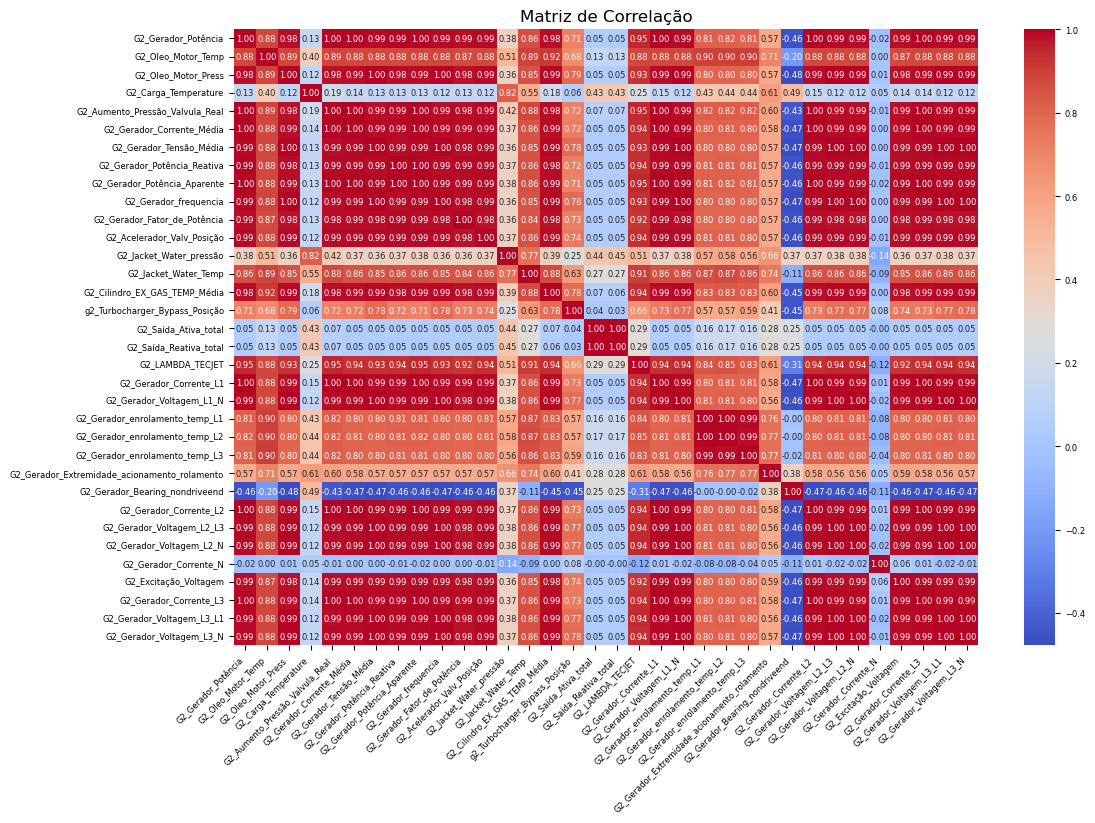

In [3]:
# Calcular a matriz de correlação
correlation_matrix = df_parte_I.corr()

# Plotar um mapa de calor da matriz de correlação com tamanho de fonte ajustado
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f",
                      annot_kws={"size": 6})

# Ajustar o tamanho das labels dos eixos x e y
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=6)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=6)

# Ajustar o tamanho dos ticks da barra de cores
cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=6)

plt.title('Matriz de Correlação')
plt.show()

### VARIÁVEIS TARGET e OTHERS VARIABLES

In [4]:
# Chamada da função para plotar os gráficos com cores diferentes
main_var = 'G2_Gerador_Potência'
other_vars = ['G2_Oleo_Motor_Temp', 'G2_Oleo_Motor_Press',
            'G2_Carga_Temperature', 'G2_Aumento_Pressão_Valvula_Real',
            'G2_Gerador_Corrente_Média', 'G2_Gerador_Tensão_Média',
            'G2_Gerador_Potência_Reativa', 'G2_Gerador_Potência_Aparente',
            'G2_Gerador_frequencia', 'G2_Gerador_Fator_de_Potência',
            'G2_Acelerador_Valv_Posição', 'G2_Jacket_Water_pressão',
            'G2_Jacket_Water_Temp', 'G2_Cilindro_EX_GAS_TEMP_Média',
            'g2_Turbocharger_Bypass_Posição', 'G2_Saída_Ativa_total',
            'G2_Saída_Reativa_total', 'G2_LAMBDA_TECJET', 'G2_Gerador_Corrente_L1',
            'G2_Gerador_Voltagem_L1_N', 'G2_Gerador_enrolamento_temp_L1',
            'G2_Gerador_enrolamento_temp_L2', 'G2_Gerador_enrolamento_temp_L3',
            'G2_Gerador_Extremidade_acionamento_rolamento',
            'G2_Gerador_Bearing_nondriveend', 'G2_Gerador_Corrente_L2',
            'G2_Gerador_Voltagem_L2_L3', 'G2_Gerador_Voltagem_L2_N',
            'G2_Gerador_Corrente_N', 'G2_Excitação_Voltagem',
            'G2_Gerador_Corrente_L3', 'G2_Gerador_Voltagem_L3_L1',
            'G2_Gerador_Voltagem_L3_N']

In [43]:
# Chamada da função para plotar os gráficos com cores diferentes
main_var = 'G2_Gerador_Potência'
other_vars = ['G2_Carga_Temperature']

### GRAFICOS DE CORRELAÇÃO CRUZADA COM P ATIVA COMO TARGET - Lag's minutos

In [ ]:
def plot_correlation_with_lags(main_var, other_vars, df_parte_I):
    # Definir uma lista de cores
    colors = ['blue', 'green', 'red', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan',
              'magenta', 'yellow', 'black', 'darkblue', 'darkgreen', 'darkred', 'darkorange', 'blue', 
              'green', 'red', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan', 'magenta', 
              'yellow', 'black', 'darkblue', 'darkgreen', 'darkred', 'darkorange', 'blue', 'green', 'red']

    # Calcular o número total de lags de 6 horas
    total_lags = int((df_parte_I.index.max() - df_parte_I.index.min()).total_seconds() / (60 * 5))

    # Plotar o gráfico de correlação para cada coluna com cores diferentes
    for i, coluna in enumerate(other_vars):
        plt.figure(figsize=(18, 8))
        correlation_with_lag = [df_parte_I[main_var].corr(df_parte_I[coluna].shift(lag, freq='5M')) for lag in range(total_lags)]
        plt.plot(range(total_lags), correlation_with_lag, label=coluna, color=colors[i % len(colors)])
        plt.xlabel('Lags (5 minutos)')
        plt.ylabel('Correlação')
        plt.title(f'Correlação com lags de 5 minutos entre {main_var} e {coluna}')
        plt.legend()
        plt.ylim(-1, 1)
        plt.xticks(np.arange(0, total_lags, 12), fontsize=5.5)  # Defina os marcadores a cada 4 lags (ou seja, a cada 24 horas) para evitar a poluição do eixo x
        plt.grid(True)
        plt.tight_layout()
        plt.show()

plot_correlation_with_lags(main_var, other_vars, df_parte_I)

### GRAFICOS DE CORRELAÇÃO CRUZADA COM P ATIVA COMO TARGET - Lag's horas

In [ ]:
def plot_correlation_with_lags(main_var, other_vars, df_parte_I, output_dir):
    colors = ['blue', 'green', 'red', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan',
              'magenta', 'yellow', 'black', 'darkblue', 'darkgreen', 'darkred', 'darkorange', 'blue', 
              'green', 'red', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan', 'magenta', 
              'yellow', 'black', 'darkblue', 'darkgreen', 'darkred', 'darkorange', 'blue', 'green', 'red']

    total_lags = int((df_parte_I.index.max() - df_parte_I.index.min()).total_seconds() / (60 * 60 * 1))

    for i, coluna in enumerate(other_vars):
        plt.figure(figsize=(18, 8))
        correlation_with_lag = [df_parte_I[main_var].corr(df_parte_I[coluna].shift(lag, freq='H')) for lag in range(total_lags)]
        plt.plot(range(total_lags), correlation_with_lag, label=coluna, color=colors[i % len(colors)])
        plt.xlabel('Lags (1 hora)')
        plt.ylabel('Correlação')
        plt.title(f'Correlação com lags de 1 hora entre {main_var} e {coluna}')
        plt.legend()
        plt.ylim(-1, 1)
        plt.xticks(np.arange(0, total_lags, 24), fontsize=5.5)  
        plt.grid(True)
        plt.tight_layout()
        plt.show()
        
        # Criando o nome do arquivo com base no título do gráfico
        filename = f"{output_dir}/{main_var}_vs_{coluna}_correlation.jpg"
        
        # Certifique-se de que o diretório de saída exista antes de salvar
        os.makedirs(os.path.dirname(filename), exist_ok=True)
        
        # Salvar a figura em formato JPEG
        plt.savefig(filename, format='jpg')
        
        # Exibir o gráfico
        plt.show()

# Chamada da função para plotar os gráficos com lags de 2 horas e salvar em um diretório específico
output_dir = "H:/Path_Python/Dados_Python_2024/Lameirinho/Ficheiros_PKL_Saida/Graficos_output_correlacao_cruzada"
plot_correlation_with_lags(main_var, other_vars, df_parte_I, output_dir)

### CORRELAÇÃO CRUZADA COM VÁRIAS VARIÁVEIS

In [ ]:
### Chamada da Função:
main_var = 'G2_Gerador_Potência_Aparente'
other_vars = ['G2_Oleo_Motor_Temp', 'G2_Gerador_Potência', 'G2_Carga_Temperature']
plot_correlation_with_lags(main_var, other_vars, df_parte_I)